In [20]:

import statsmodels as stm
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import seaborn as sns

**World data**

In [21]:
RH_WRLD_ds=xr.open_dataset('Relative Humidity.mon.mean.nc')
TMP_WRLD_ds=xr.open_dataset("air.2m.mon.mean.nc")

**Location: Hyderabad (Inland)**

In [22]:
RH_HYD_ds = RH_WRLD_ds.sel(lon=[77.5], lat=[17.5], time=slice("1998-01-01", "2022-08-01"), method=None)
TMP_HYD_ds = TMP_WRLD_ds.sel(lon=[78.75], lat=[18.095], time=slice("1998-01-01", "2022-08-01"), method=None)

**Location: Corpus Christi (Coastal)**

In [23]:
RH_CRP_ds = RH_WRLD_ds.sel(lon=[262.5], lat=[27.5], time=slice("1998-01-01", "2022-08-01"), method=None)
TMP_CRP_ds = TMP_WRLD_ds.sel(lon=[262.5], lat=[27.6186], time=slice("1998-01-01", "2022-08-01"), method=None)

**Location: Bengaluru (Inland)**

In [24]:
RH_BGL_ds = RH_WRLD_ds.sel(lon=[77.5], lat=[12.5], time=slice("1998-01-01", "2022-08-01"), )
TMP_BGL_ds = TMP_WRLD_ds.sel(lon=[76.875], lat=[12.3808], time=slice("1998-01-01", "2022-08-01"), )

**Data for plotting distributions**

In [25]:
Time=np.array(RH_CRP_ds.time.values)

RH_HYD = RH_HYD_ds.rhum.stack(z=['time', 'lat', 'lon'])
TMP_HYD = TMP_HYD_ds.air.stack(z=['time', 'lat', 'lon'])

RH_CRP = RH_CRP_ds.rhum.stack(z=['time', 'lat', 'lon'])
TMP_CRP = TMP_CRP_ds.air.stack(z=['time', 'lat', 'lon'])

RH_BGL = RH_BGL_ds.rhum.stack(z=['time', 'lat', 'lon'])
TMP_BGL = TMP_BGL_ds.air.stack(z=['time', 'lat', 'lon'])


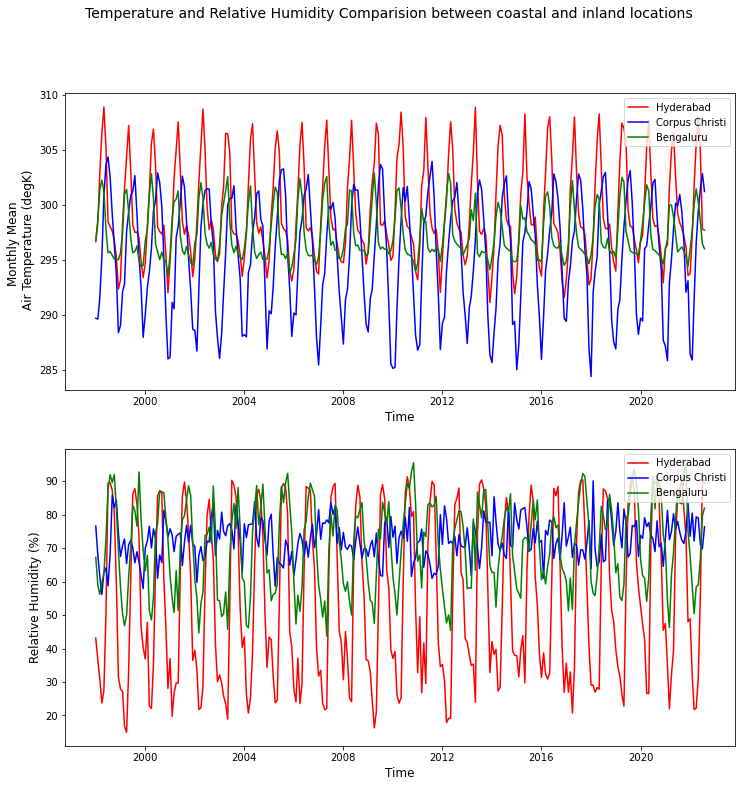

In [26]:
fig1, axes=plt.subplots(nrows=2, ncols=1, figsize=(12,12))
fig1.suptitle("Temperature and Relative Humidity Comparision between coastal and inland locations", fontsize=14)
axes[0].plot(Time, TMP_HYD, color='red', label="Hyderabad")
axes[0].plot(Time, TMP_CRP, color='blue', label="Corpus Christi")
axes[0].plot(Time, TMP_BGL, color='green', label="Bengaluru")
axes[0].set_ylabel("Monthly Mean \n Air Temperature (degK)", fontsize=12) 
axes[0].set_xlabel("Time", fontsize=12)
axes[0].legend(loc="upper right")

axes[1].plot(Time, RH_HYD, color='red', label="Hyderabad")
axes[1].plot(Time, RH_CRP, color='blue', label="Corpus Christi")
axes[1].plot(Time, RH_BGL, color='green', label="Bengaluru")
axes[1].set_ylabel("Relative Humidity (%)", fontsize=12) 
axes[1].set_xlabel("Time", fontsize=12)
axes[1].legend(loc="upper right")

**Calculating Pearson product-moment correlation coefficient to test the hypothesis**

In [27]:
st.pearsonr(RH_HYD, TMP_HYD)

PearsonRResult(statistic=-0.29978557109811077, pvalue=1.4619231658198855e-07)

In [28]:
st.pearsonr(RH_CRP, TMP_CRP)

PearsonRResult(statistic=-0.15595518974821201, pvalue=0.0071823346856270415)

In [29]:
st.pearsonr(RH_BGL, TMP_BGL)

PearsonRResult(statistic=-0.6812729543040387, pvalue=1.0087841014361158e-41)

**Creating the Correlation Matrix for plotting**

In [30]:
np.corrcoef(RH_HYD.values, TMP_HYD.values)

array([[ 1.        , -0.29978557],
       [-0.29978557,  1.        ]])

In [31]:
np.corrcoef(RH_CRP.values, TMP_CRP.values)

array([[ 1.        , -0.15595519],
       [-0.15595519,  1.        ]])

In [32]:
np.corrcoef(RH_BGL.values, TMP_BGL.values)

array([[ 1.        , -0.68127295],
       [-0.68127295,  1.        ]])

**Performing Spearman Correlation Test**

In [33]:
st.spearmanr(RH_HYD, TMP_HYD)

SpearmanrResult(correlation=-0.269424556802389, pvalue=2.5637297810946653e-06)

In [34]:
st.spearmanr(RH_CRP, TMP_CRP)

SpearmanrResult(correlation=-0.19818008153698372, pvalue=0.0006052130135092617)

In [35]:
st.spearmanr(RH_BGL, TMP_BGL)

SpearmanrResult(correlation=-0.6290038796124043, pvalue=5.204501347056998e-34)

**Scatter plot to analyze the correlations with regression line**

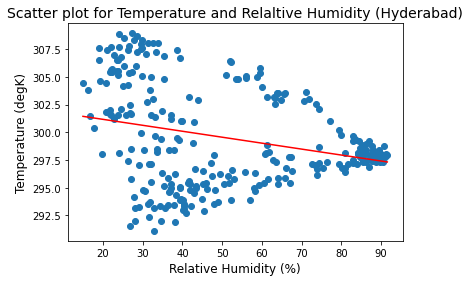

In [36]:
plt.scatter(RH_HYD.values, TMP_HYD.values)
 
plt.plot(np.unique(RH_HYD.values), np.poly1d(np.polyfit(RH_HYD.values, TMP_HYD.values, 1))
         (np.unique(RH_HYD.values)), color='red')
plt.xlabel("Relative Humidity (%)", fontsize=12)
plt.ylabel("Temperature (degK)", fontsize=12)
plt.title("Scatter plot for Temperature and Relaltive Humidity (Hyderabad)", fontsize=14)
plt.savefig("Hyderabad scatter plot")

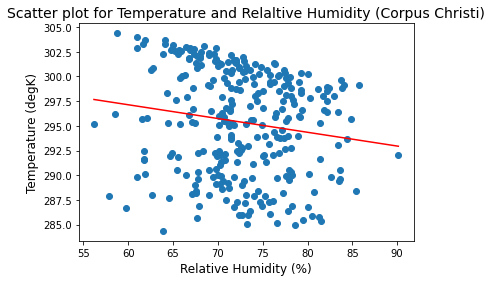

In [37]:
plt.scatter(RH_CRP.values, TMP_CRP.values)
 
plt.plot(np.unique(RH_CRP.values), np.poly1d(np.polyfit(RH_CRP.values, TMP_CRP.values, 1))
         (np.unique(RH_CRP.values)), color='red')
plt.xlabel("Relative Humidity (%)", fontsize=12)
plt.ylabel("Temperature (degK)", fontsize=12)
plt.title("Scatter plot for Temperature and Relaltive Humidity (Corpus Christi)", fontsize=14)
plt.savefig("Corpus Christi scatter plot")

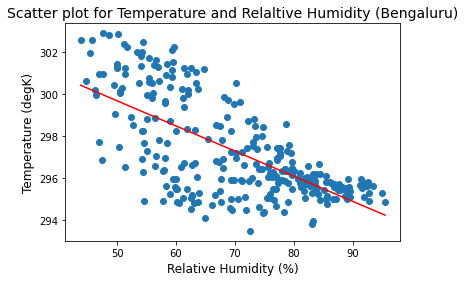

In [38]:
plt.scatter(RH_BGL.values, TMP_BGL.values)
 
plt.plot(np.unique(RH_BGL.values), np.poly1d(np.polyfit(RH_BGL.values, TMP_BGL.values, 1))
         (np.unique(RH_BGL.values)), color='red')
plt.xlabel("Relative Humidity (%)", fontsize=12)
plt.ylabel("Temperature (degK)", fontsize=12)
plt.title("Scatter plot for Temperature and Relaltive Humidity (Bengaluru)", fontsize=14)
plt.savefig("Bengaluru Scatter plot")